# Data Loading and Exploration

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('house_price_csv_.csv')
data.head()



,area,rooms,price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,NaN
4,3000.0,4.0,539900.0


In [3]:
# Show first few rows
data.head()

,area,rooms,price
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,NaN
4,3000.0,4.0,539900.0


In [4]:
# Check for missing values
data.isnull().sum()

area     1
rooms    3
price    4
dtype: int64

# Handling Missing Values


In [7]:
data['price'].fillna(data['price'].median(), inplace=True)
data['area'].fillna(data['area'].mean(), inplace=True)
data['rooms'].fillna(data['rooms'].mean(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21476\2718353762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['price'].fillna(data['price'].median(), inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21476\2718353762.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

# Visualize Data

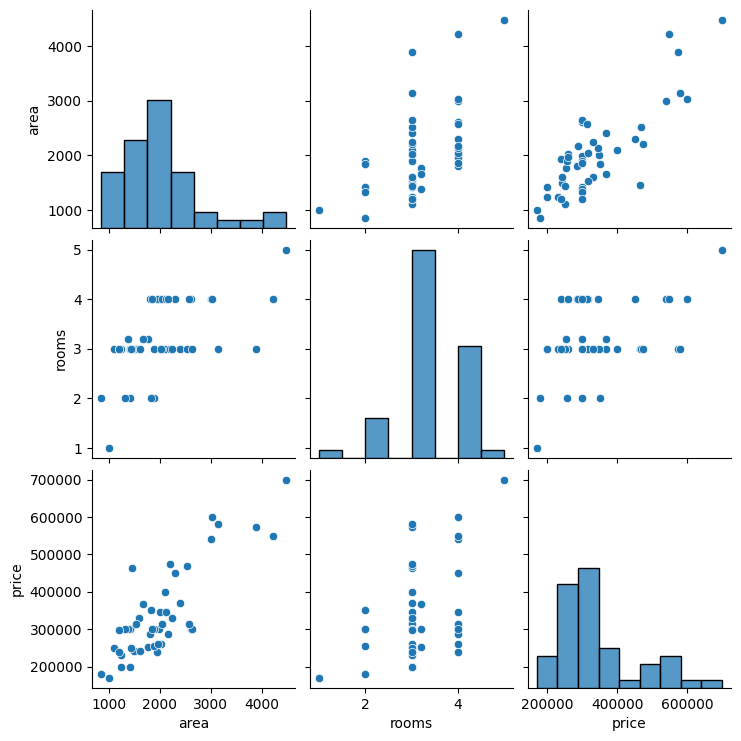

In [8]:
# Distribution plots
sns.pairplot(data)
plt.show()


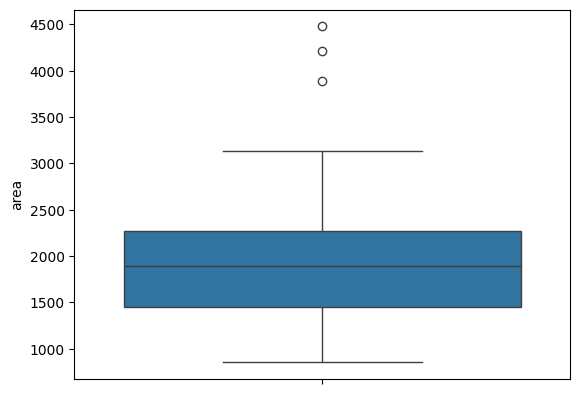

In [9]:
# Box plots to detect outliers
sns.boxplot(data['area'])
plt.show()


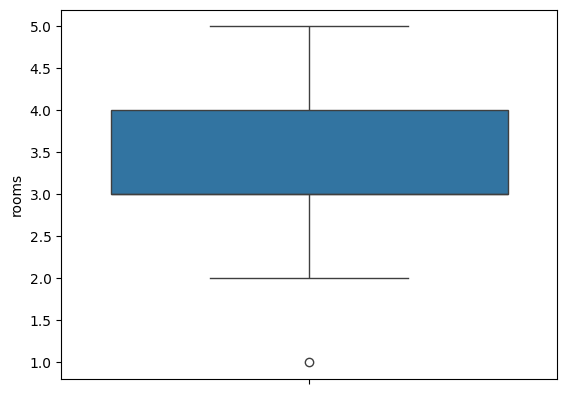

In [10]:
sns.boxplot(data['rooms'])
plt.show()

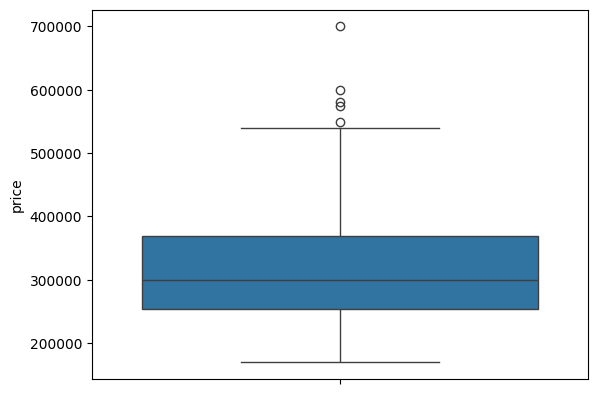

In [11]:
sns.boxplot(data['price'])
plt.show()

# Handling Outliers

In [14]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

data = remove_outliers(data, 'price')
data = remove_outliers(data, 'rooms')
data = remove_outliers(data, 'area')

# Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

X = data[['area', 'rooms']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Building

In [17]:
from sklearn.linear_model import LinearRegression
import pickle

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

## save the model

In [18]:
# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)